In [3]:
# TASK 1
import pandas as pd
df = pd.read_csv(r'C:\Users\Komal Jain\OneDrive\Desktop\New folder (2)\cognifyzdataset.csv')


In [4]:
print(df.head())
print(df.columns)


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [5]:
df['Has Table booking'] = df['Has Table booking'].str.strip().str.title()
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.title()


In [6]:
both_services = df[(df['Has Table booking'] == 'Yes') & 
                   (df['Has Online delivery'] == 'Yes')]


In [7]:
total_restaurants = len(df)
restaurants_with_both_services = len(both_services)
percentage = (restaurants_with_both_services / total_restaurants) * 100

print(f"Percentage of restaurants offering both services: {percentage:.2f}%")


Percentage of restaurants offering both services: 4.55%


In [8]:
# Group by city and count restaurants that offer both services
city_wise = df[df['Has Table booking'].eq('Yes') & df['Has Online delivery'].eq('Yes')].groupby('City').size()

# Sort results in descending order
city_wise = city_wise.sort_values(ascending=False)

print(city_wise)


City
New Delhi       275
Gurgaon          70
Noida            48
Chennai          11
Abu Dhabi         4
Dubai             4
Hyderabad         4
Mumbai            4
Pune              4
Bangalore         3
Faridabad         3
Kolkata           3
Ghaziabad         1
Secunderabad      1
dtype: int64


In [9]:
total_by_city = df['City'].value_counts()  # Get total restaurants per city
percentage_by_city = (city_wise / total_by_city * 100).round(2)
print(percentage_by_city)


City
Abu Dhabi          20.0
Agra                NaN
Ahmedabad           NaN
Albany              NaN
Allahabad           NaN
                   ... 
Weirton             NaN
Wellington City     NaN
Winchester Bay      NaN
Yorkton             NaN
��stanbul           NaN
Length: 141, dtype: float64


In [10]:
# Calculate percentage and replace NaN values with 0
percentage_by_city = (city_wise / total_by_city * 100).round(2).fillna(0)

# Display sorted results
print(percentage_by_city.sort_values(ascending=False))


City
Chennai         55.00
Secunderabad    50.00
Hyderabad       22.22
Abu Dhabi       20.00
Mumbai          20.00
                ...  
Edinburgh        0.00
East Ballina     0.00
Dubuque          0.00
Doha             0.00
��stanbul        0.00
Length: 141, dtype: float64


In [11]:
df['City'] = df['City'].replace('��stanbul', 'Istanbul')


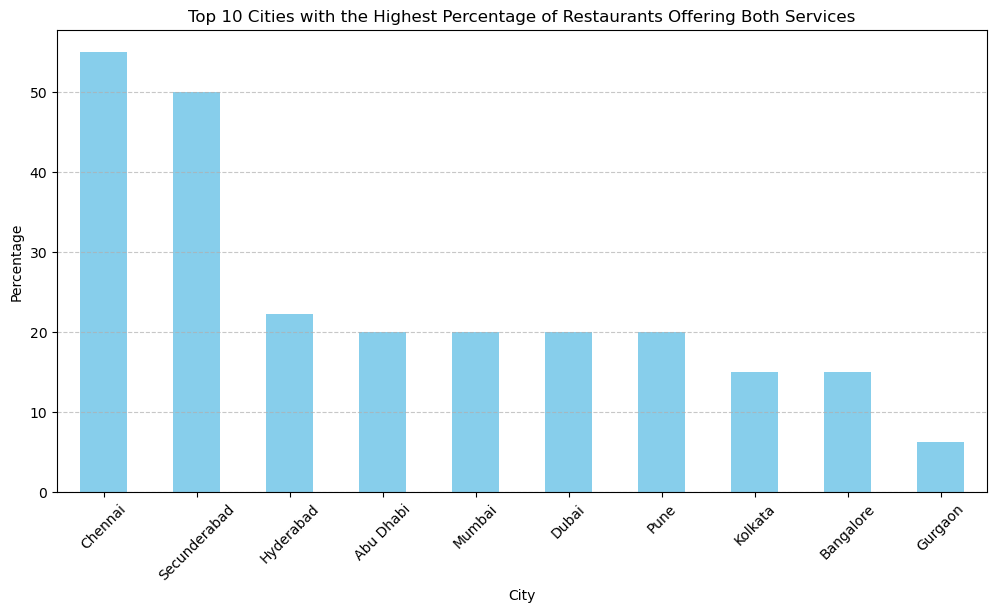

In [12]:
import matplotlib.pyplot as plt

# Select top 10 cities with the highest percentage
top_cities = percentage_by_city.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Highest Percentage of Restaurants Offering Both Services')
plt.xlabel('City')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
# Check for missing values in relevant columns
print(df[['Has Table booking', 'Aggregate rating']].isnull().sum())

# Drop rows with missing data in these columns
df = df.dropna(subset=['Has Table booking', 'Aggregate rating'])


Has Table booking    0
Aggregate rating     0
dtype: int64


In [14]:
print(df[['Has Table booking', 'Aggregate rating']].dtypes)


Has Table booking     object
Aggregate rating     float64
dtype: object


In [15]:
print(df['Has Table booking'].unique())


['Yes' 'No']


In [16]:
# Group by 'Has Table booking' and calculate the average rating for each group
average_ratings = df.groupby('Has Table booking')['Aggregate rating'].mean()

# Print the results
print(average_ratings)


Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [17]:
# Compare the average ratings
if average_ratings['Yes'] > average_ratings['No']:
    print(f"Restaurants with table booking have a higher average rating ({average_ratings['Yes']:.2f}) compared to those without table booking ({average_ratings['No']:.2f}).")
    print("This suggests that table booking may be associated with higher customer satisfaction.")
else:
    print(f"Restaurants without table booking have a higher average rating ({average_ratings['No']:.2f}) compared to those with table booking ({average_ratings['Yes']:.2f}).")
    print("This suggests that other factors might be influencing customer satisfaction more than the availability of table booking.")


Restaurants with table booking have a higher average rating (3.44) compared to those without table booking (2.56).
This suggests that table booking may be associated with higher customer satisfaction.


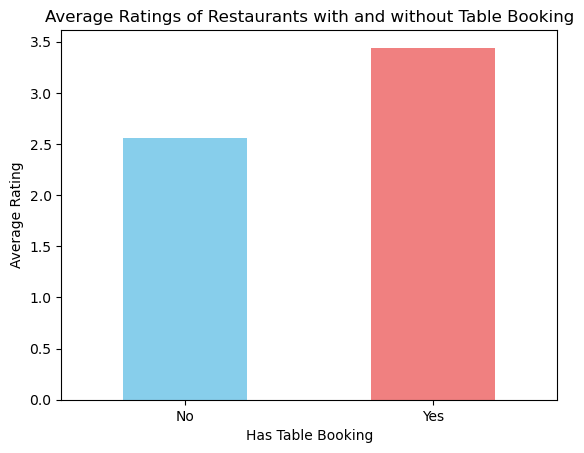

In [18]:
import matplotlib.pyplot as plt

# Plotting the average ratings of restaurants with and without table booking
average_ratings.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Ratings of Restaurants with and without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # To make x-axis labels readable
plt.show()


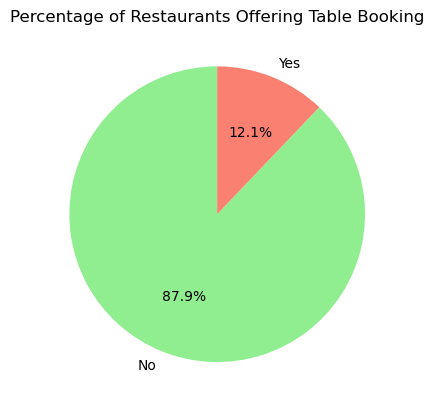

In [19]:
table_booking_counts = df['Has Table booking'].value_counts()

# Pie chart to show percentage of restaurants with and without table booking
table_booking_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Percentage of Restaurants Offering Table Booking')
plt.ylabel('')  # To remove the y-axis label
plt.show()


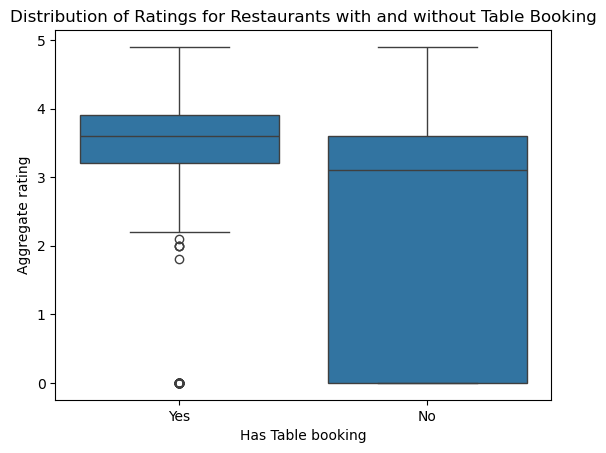

In [20]:
import seaborn as sns

# Create a box plot to compare the distribution of ratings
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Distribution of Ratings for Restaurants with and without Table Booking')
plt.show()


In [21]:
# Check for missing values
df[['Has Online delivery', 'Price range']].isnull().sum()

# Check data types
df[['Has Online delivery', 'Price range']].dtypes


Has Online delivery    object
Price range             int64
dtype: object

In [22]:
# Convert 'Has Online delivery' to binary (Yes = 1, No = 0)
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})


In [23]:
# Check for missing values in relevant columns
missing_values = df[['Has Online delivery', 'Price range']].isnull().sum()
print(missing_values)

# Handle missing values (if any) - Example: drop rows with missing values
df = df.dropna(subset=['Has Online delivery', 'Price range'])


Has Online delivery    0
Price range            0
dtype: int64


In [24]:
# Verify the 'Price range' values are correct
print(df['Price range'].unique())



[3 4 2 1]


In [25]:
# Group the data by 'Price range' and calculate the percentage of restaurants with online delivery
delivery_percentage = df.groupby('Price range')['Has Online delivery'].mean() * 100

# Print the results
print(delivery_percentage)


Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64


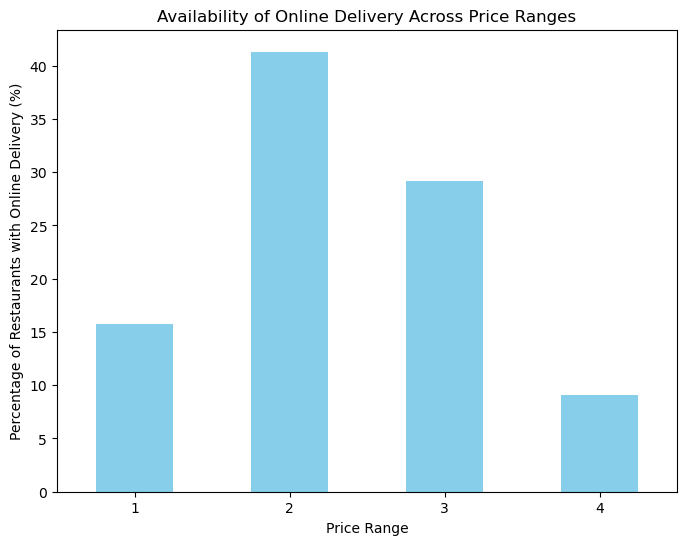

In [26]:
import matplotlib.pyplot as plt

# Plot the delivery percentages by price range
plt.figure(figsize=(8, 6))
delivery_percentage.plot(kind='bar', color='skyblue')
plt.title('Availability of Online Delivery Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants with Online Delivery (%)')
plt.xticks(rotation=0)
plt.show()


In [27]:
# Results of the analysis (the calculated percentages you shared earlier)
delivery_percentage = {
    1: 15.77,
    2: 41.31,
    3: 29.19,
    4: 9.04
}

# Interpret the results based on the calculated percentages
highest_delivery_price_range = max(delivery_percentage, key=delivery_percentage.get)
lowest_delivery_price_range = min(delivery_percentage, key=delivery_percentage.get)

# Generate the interpretation summary
interpretation = f"""
The analysis reveals that the availability of online delivery is most common in restaurants within Price range {highest_delivery_price_range} 
({delivery_percentage[highest_delivery_price_range]}%). This suggests that mid-tier restaurants are more likely to provide delivery options.

In contrast, Price range {lowest_delivery_price_range} restaurants have the lowest availability of online delivery 
({delivery_percentage[lowest_delivery_price_range]}%), indicating that high-end restaurants may prioritize in-house dining experiences over delivery.
"""

print(interpretation)



The analysis reveals that the availability of online delivery is most common in restaurants within Price range 2 
(41.31%). This suggests that mid-tier restaurants are more likely to provide delivery options.

In contrast, Price range 4 restaurants have the lowest availability of online delivery 
(9.04%), indicating that high-end restaurants may prioritize in-house dining experiences over delivery.



In [28]:
# TASK 2
# Check for missing values and data types
print(df['Price range'].isnull().sum())  # To check missing values
print(df['Price range'].dtype)  # To check the data type


0
int64


In [29]:
# Calculate the most common price range
most_common_price_range = df['Price range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")


The most common price range is: 1


In [30]:
# Calculate the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts()

# Count how many restaurants are in Price range 1
most_common_count = price_range_counts[1]
print(f"The number of restaurants in Price range 1 is: {most_common_count}")


The number of restaurants in Price range 1 is: 4444


In [31]:
# Summarize findings
summary = f"The most common price range among all restaurants is Price range 1, with {most_common_count} restaurants."
print(summary)


The most common price range among all restaurants is Price range 1, with 4444 restaurants.


In [32]:
# Group the data by 'Price range' and calculate the average 'Aggregate rating' for each price range
average_ratings_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()

# Print the results
print(average_ratings_by_price_range)


Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [33]:
# Summary of findings
summary = """
The analysis shows the following average ratings across different price ranges:
- Price range 1: 1.99
- Price range 2: 2.94
- Price range 3: 3.68
- Price range 4: 3.82

This suggests that higher-priced restaurants tend to have higher customer satisfaction, while budget-friendly options have relatively lower ratings.
"""
print(summary)



The analysis shows the following average ratings across different price ranges:
- Price range 1: 1.99
- Price range 2: 2.94
- Price range 3: 3.68
- Price range 4: 3.82

This suggests that higher-priced restaurants tend to have higher customer satisfaction, while budget-friendly options have relatively lower ratings.



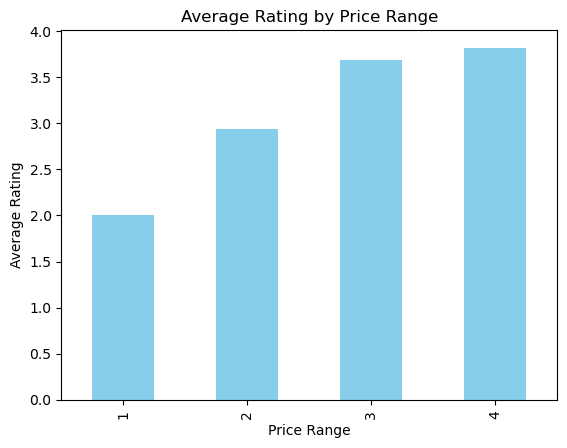

In [34]:
import matplotlib.pyplot as plt

# Plot a bar chart
average_ratings_by_price_range.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()


In [35]:
# Find the price range with the highest average rating
highest_avg_rating_price_range = average_ratings_by_price_range.idxmax()

# Find the highest average rating for that price range
highest_avg_rating = average_ratings_by_price_range.max()
print(f"Price range with the highest average rating: {highest_avg_rating_price_range}")
print(f"Highest average rating: {highest_avg_rating}")


Price range with the highest average rating: 4
Highest average rating: 3.8179180887372017


In [36]:
# Filter the dataset to get the Rating color for the price range with the highest average rating
rating_color_for_highest_avg = df[df['Price range'] == 4]['Rating color'].iloc[0]
print(f"The color representing the highest average rating is: {rating_color_for_highest_avg}")


The color representing the highest average rating is: Green


In [37]:
# TASK 3
# Create a new column 'Name Length' to store the length of the restaurant name
df['Name Length'] = df['Restaurant Name'].apply(len)


In [38]:
# Create a new column 'Address Length' to store the length of the address
df['Address Length'] = df['Address'].apply(len)


In [39]:
# Display the first few rows to verify the new columns
print(df[['Restaurant Name', 'Name Length', 'Address', 'Address Length']].head())


          Restaurant Name  Name Length  \
0        Le Petit Souffle           16   
1        Izakaya Kikufuji           16   
2  Heat - Edsa Shangri-La           22   
3                    Ooma            4   
4             Sambo Kojin           11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


In [40]:
# Check correlation between new features and others
correlation = df[['Name Length', 'Address Length', 'Aggregate rating', 'Price range']].corr()
print(correlation)


                  Name Length  Address Length  Aggregate rating  Price range
Name Length          1.000000        0.009567         -0.035178     0.061704
Address Length       0.009567        1.000000          0.002334     0.068026
Aggregate rating    -0.035178        0.002334          1.000000     0.437944
Price range          0.061704        0.068026          0.437944     1.000000


In [41]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'df' is your DataFrame with relevant features, and 'Aggregate rating' is the target
# Select features (X) and target (y)
X = df[['Name Length', 'Address Length', 'Price range', 'Has Table booking']]  # Include any other features you're considering
y = df['Aggregate rating']

# Convert categorical variables (like 'Has Table booking') to numeric values
X.loc[:, 'Has Table booking'] = X['Has Table booking'].map({'Yes': 1, 'No': 0})


# Initialize the RandomForestRegressor
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)


             Feature  Importance
1     Address Length    0.382933
2        Price range    0.317336
0        Name Length    0.287205
3  Has Table booking    0.012525


In [42]:
# Interpretation of feature importance
print("\nInterpretation of Feature Importance:")
if feature_importance_df.iloc[0]['Feature'] == 'Address Length':
    print("- 'Address Length' has the highest importance, suggesting that longer addresses may correlate with better ratings.")
if feature_importance_df.iloc[1]['Feature'] == 'Price range':
    print("- 'Price range' is also significant, indicating that affordability/luxury influences restaurant ratings.")
if feature_importance_df.iloc[2]['Feature'] == 'Name Length':
    print("- 'Name Length' has moderate importance, implying longer names might attract more attention.")
if feature_importance_df.iloc[3]['Feature'] == 'Has Table booking':
    print("- 'Has Table booking' has low importance, meaning it has minimal impact on ratings.")



Interpretation of Feature Importance:
- 'Address Length' has the highest importance, suggesting that longer addresses may correlate with better ratings.
- 'Price range' is also significant, indicating that affordability/luxury influences restaurant ratings.
- 'Name Length' has moderate importance, implying longer names might attract more attention.
- 'Has Table booking' has low importance, meaning it has minimal impact on ratings.


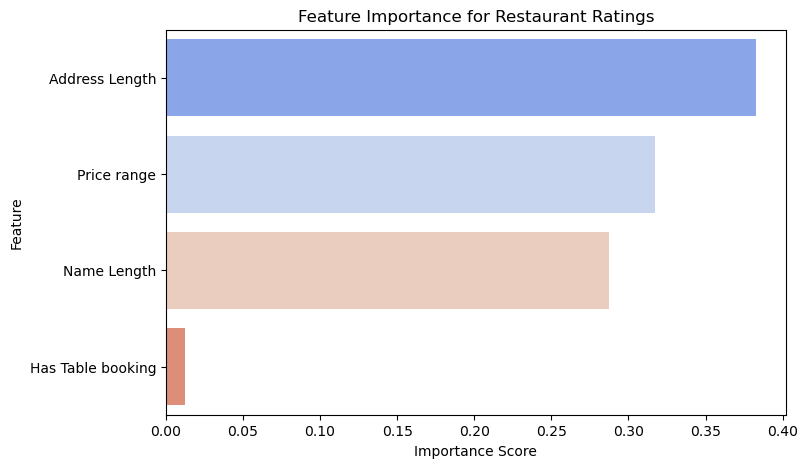

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_importance_df, 
    x='Importance', 
    y='Feature', 
    hue='Feature',  # Assign hue to the same column as y
    palette="coolwarm", 
    legend=False  # Disable legend as it's not needed
)

plt.title('Feature Importance for Restaurant Ratings')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [44]:
summary = f"""
Feature Importance Analysis:

1. Address Length has the highest importance ({feature_importance_df.loc[0, 'Importance']:.2f}). 
   - Restaurants with detailed addresses may receive better ratings.

2. Price Range is also an important factor ({feature_importance_df.loc[1, 'Importance']:.2f}). 
   - Mid-tier restaurants might have a balance between cost and quality, influencing ratings.

3. Name Length ({feature_importance_df.loc[2, 'Importance']:.2f}) shows a moderate impact. 
   - Catchy or descriptive restaurant names may influence customer perception.

4. Has Table Booking ({feature_importance_df.loc[3, 'Importance']:.2f}) has the least impact. 
   - This suggests that table booking is not a major factor affecting customer satisfaction.
"""

print(summary)



Feature Importance Analysis:

1. Address Length has the highest importance (0.29). 
   - Restaurants with detailed addresses may receive better ratings.

2. Price Range is also an important factor (0.38). 
   - Mid-tier restaurants might have a balance between cost and quality, influencing ratings.

3. Name Length (0.32) shows a moderate impact. 
   - Catchy or descriptive restaurant names may influence customer perception.

4. Has Table Booking (0.01) has the least impact. 
   - This suggests that table booking is not a major factor affecting customer satisfaction.



In [45]:
print(df['Has Table booking'].unique())
print(df['Has Online delivery'].unique())


['Yes' 'No']
[0 1]


In [90]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})


In [92]:
print(df[['Has Table booking', 'Has Online delivery']].head())
print(df.dtypes)


   Has Table booking  Has Online delivery
0                  1                    0
1                  1                    0
2                  1                    0
3                  0                    0
4                  1                    0
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking         int64
Has Online delivery       int64
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Name Length               int64
Address Length            int64
dtype: objec